# 在Ipython中的魔法命令

`魔法命令`是Jupyter中一种宏机制的一个称呼.Jupyter运行的本质是交互层给核心程序提出请求命令,由核心层再根据命令执行相应的操作.这也就意味着核心层实际是代码执行器的代理,那自然的除了代码执行器可以执行的代码外,我们也可以直接向核心程序提出命令.这种代码以外由核心程序执行的命令就是`魔法命令`.
`魔法命令`机制十分强大好用,对代码执行是一个很好的补充.`ipykernel`中默认的魔法命令非常丰富,它可以让一些用python代码做起来非常麻烦的操作非常简单的就可以实现;子项目`ipyparallel`也提供了对应的魔法命令,可以非常简单的实现多核并行运算;`Ipython`项目也提供了用于自定义`魔法命令`的工具,许多第三方库尤其是性能优化用的库都提供了对应的`魔法命令`.

Ipython中也有别名等其他宏机制,但用处不大这边也就不做介绍了.

本文主要讲它的使用和设置方法,以及魔法命令

## 魔法命令的使用

使用`Ipython`构造的`魔法命令`分为2种:

+ 单行魔法命令,解析魔法命令所在行后执行对应操作.调用时以`%`开头的称为行命令.行命令只对命令所在的行有效.其使用形式为:
    ```bash
    ...
    %cmd [opts][ args]
    ...
    ```
    
+ 单元格魔法命令,解析魔法命令所在行以及魔法命令所在单元格后执行对应操作.调用时以`%%`开头的称为单元命令.单元命令必须出现在单元的第一行,它会对整个单元的代码进行处理.其使用形式为:

    ```bash
    %%cmd [opts][ args]
    ...
    ```

In [1]:
%timeit sum(map(lambda x:x**2,range(10000000)))

2.55 s ± 15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


除此以外`ipykernel`允许使用`!cmd`的形式调用系统中的命令

In [2]:
!time

shell  0.00s user 0.01s system 293% cpu 0.004 total
children  0.00s user 0.00s system 0% cpu 0.004 total


## 默认的魔法命令

`ipykernel`里已经定义了大量魔法命令,执行`%lsmagic`就可以查看关于各个命令的说明.而在命令之后添加`?`可以查看该命令的详细说明。

In [3]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %conda  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%

In [4]:
%timeit?

Docstring:
Time execution of a Python statement or expression

Usage, in line mode:
  %timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] statement
or in cell mode:
  %%timeit [-n<N> -r<R> [-t|-c] -q -p<P> -o] setup_code
  code
  code...

Time execution of a Python statement or expression using the timeit
module.  This function can be used both as a line and cell magic:

- In line mode you can time a single-line statement (though multiple
  ones can be chained with using semicolons).

- In cell mode, the statement in the first line is used as setup code
  (executed but not timed) and the body of the cell is timed.  The cell
  body has access to any variables created in the setup code.

Options:
-n<N>: execute the given statement <N> times in a loop. If <N> is not
provided, <N> is determined so as to get sufficient accuracy.

-r<R>: number of repeats <R>, each consisting of <N> loops, and take the
best result.
Default: 7

-t: use time.time to measure the time, which is the default on Unix.
This f

### 常用魔法命令

> %pwd

%pwd命令可以获取当前目录的信息


In [5]:
%pwd

'/Users/mac/WORKSPACE/GITHUB/BLOG/TutorialForPython/src/工具链篇/交互环境jupyter/Jupyter的核心层'

> %cd

%cd 可以跳转到目标目录,`tab`键可以补完

> 将cell的输出保存到对象`%%capture result`

输出的内容会被以string的形式保存在`stdout`属性上

show()方法可以看到实际输出的内容

In [6]:
%%capture result

print([1,2,3])

In [7]:
result.stdout

'[1, 2, 3]\n'

In [8]:
result.show()

[1, 2, 3]


> 写入文件 %%writefile

In [9]:
%%writefile hello.py

#coding:utf-8
print("hello")

Writing hello.py


> 载入已有文件%load


In [10]:
# %load hello.py

print("hello")

hello


> 执行已有文件%run



In [11]:
%run hello.py

hello


## `*`自定义魔法命令

[ipython](https://ipython.readthedocs.io/en/stable/api/index.html)是允许自定义魔法命令的,有两种形式:

+ 函数形式,通过装饰器装饰一个函数.被装饰函数的函数名就是魔法命令名,调用这个魔法命令时实际执行的就是这个被装饰的函数

+ 类形式,用装饰器`IPython.core.magic.magics_class`装饰一个继承`IPython.core.magic.Magics`构造一个类,在其中使用装饰器装饰方法,然后调用`ipython.register_magics`对这个类进行注册.被装饰方法的方法名就是魔法命令名,调用这个魔法命令时实际执行的就是这个类的实例中的对应方法.

我们可以定义三种形式的函数/方法:

+ `line_magic`,即单行魔法命令.函数形式使用装饰器`IPython.core.magic.register_line_magic`;类形式使用装饰器`IPython.core.magic.line_magic`
+ `cell_magic`,即单元魔法命令.函数形式使用装饰器`IPython.core.magic.register_cell_magic`;类形式使用装饰器`IPython.core.magic.cell_magic`
+ `line_cell_magic`,即当使用`%`调用时作为单行魔法命令,使用`%%`调用时为多行魔法命令.函数形式使用装饰器`IPython.core.magic.register_line_cell_magic`;类形式使用装饰器`IPython.core.magic.line_cell_magic`.

### 例子

> 函数形式的例子

```python
from IPython.core.magic import (
    register_line_magic, 
    register_cell_magic,
    register_line_cell_magic
)
from typing import Any,Optional

@register_line_magic
def lmagic(line:str)->Any:
    "my line magic"
    return line

@register_cell_magic
def cmagic(line:str, cell:str)->Any:
    "my cell magic"
    return line, cell

@register_line_cell_magic
def lcmagic(line:str, cell:Optional[str]=None)->Any:
    "Magic that works both as %lcmagic and as %%lcmagic"
    if cell is None:
        print("Called as line magic")
        return line
    else:
        print("Called as cell magic")
        return line, cell
```
    
> 类形式的例子

```python
from typing import Any,Optional
from IPython.core.magic import (
    Magics, 
    magics_class,
    line_magic,
    cell_magic,
    line_cell_magic
)

# The class MUST call this class decorator at creation time
@magics_class
class MyMagics(Magics):

    @line_magic
    def lmagic(self, line:str)->Any:
        "my line magic"
        print(line)
        return line

    @cell_magic
    def cmagic(self, line:str, cell:str)->Any:
        "my cell magic"
        print(cell[:10])
        return line, cell

    @line_cell_magic
    def lcmagic(self, line:str, cell:Optional[str]=None)->Any:
        "Magic that works both as %lcmagic and as %%lcmagic"
        if cell is None:
            print("Called as line magic")
            return line
        else:
            print("Called as cell magic")
            return line, cell


# In order to actually use these magics, you must register them with a
# running IPython.  This code must be placed in a file that is loaded once
# IPython is up and running:
ip = get_ipython()
# You can register the class itself without instantiating it.  IPython will
# call the default constructor on it.
ip.register_magics(MyMagics)
```

### 魔法命令设置参数

我们可以将魔法命令类比成命令行工具,在面对复杂参数时我们也需要一个解析器来解析参数,[IPython.core.magic_arguments](https://ipython.readthedocs.io/en/stable/api/generated/IPython.core.magic_arguments.html)就是这样一个工具.

通常情况下我们将魔法命令所在行当做参数设置行,其使用方式如下例:

In [12]:
from typing import Any
from IPython.core.magic import register_cell_magic
from IPython.core.magic_arguments import (
    argument,
    kwds,
    magic_arguments,
    parse_argstring
)


@magic_arguments()
@kwds(description="a magic cmd with arguments which can print the cell string")
@argument(
    "--len",
    "-l",
    action="store_true",
    help=("是否打印命令的长度"),
)
@register_cell_magic
def cell_echo_magic(line:str, cell:str)->Any:
    args = parse_argstring(cell_echo_magic, line)
    print(f"""get code:
    {cell}
    """)
    if args.len:
        print("code len: {x}".format(x=len(cell)))

In [13]:
%%cell_echo_magic -l

1+2==3

get code:
    
1+2==3

    
code len: 8


需要注意装饰器的顺序.`@argument`用于声明flag,其参数和标准库`argparse`中的`add_argument`是一致的;`kwds`用于声明命令的设置,其参数和标准库`argparse`中的`ArgumentParser`一致.具体可以看[这篇文章].

在装饰器中定义好参数后我们需要再函数或方法中调用`parse_argstring`函数解析参数.注意`parse_argstring`的第一位参数是魔法命令对应的函数或者方法,第二位为行字符串.

当我们在调用魔法命令后加个`?`后我们也就可以看到它的说明文档.

In [14]:
%%cell_echo_magic?

Docstring:
::

  %cell_echo_magic [--len]

a magic cmd with arguments which can print the cell string

options:
  --len, -l  是否打印命令的长度
File:      /var/folders/j_/p0q1k_mj4cs0dqn0sqnshsrr0000gn/T/ipykernel_86517/3296420896.py

### 魔法命令中调用

如果要在魔法命令中调用核心执行代码可以使用`shell = IPython.core.getipython.get_ipython()->IPython.core.interactiveshell.InteractiveShell`获取当前执行的全局ipython对象,然后调用它的`shell.run_cell(raw_cell, store_history=False, silent=False, shell_futures=True, cell_id=None)`方法.`exec_val`字符串就会被当做一个cell进行执行.

如果是类形式下也可以简单的使用`self.shell`.

`shell.run_cell(raw_cell, store_history=False, silent=False, shell_futures=True, cell_id=None)`方法执行后不需要`return`就会将执行的结果放在`out`部分展示出来.

`shell.run_cell(raw_cell, store_history=False, silent=False, shell_futures=True, cell_id=None)`方法返回一个`IPython.core.interactiveshell.ExecutionResult`对象,我们可以使用特性`success`判断执行是否成功.如果有错误也可以调用方法`raise_error()`抛出错误.

如果想要异步执行也可以调用`async shell.run_cell_async(raw_cell: str, store_history=False, silent=False, shell_futures=True, *, transformed_cell: Optional[str] = None, preprocessing_exc_tuple: Optional[Any] = None, cell_id=None)`,它可以理解为就是`shell.run_cell(raw_cell, store_history=False, silent=False, shell_futures=True, cell_id=None)`的异步版本.

In [15]:
from IPython.core.getipython import get_ipython

@magic_arguments()
@kwds(description="a magic cmd with arguments which can print the cell string")
@argument(
    "--len",
    "-l",
    action="store_true",
    help=("是否打印命令的长度"),
)
@register_cell_magic
def cell_echo_and_run_magic(line:str, cell:str)->Any:
    args = parse_argstring(cell_echo_and_run_magic, line)
    print(f"""get code:
    {cell}
    """)
    if args.len:
        print("code len: {x}".format(x=len(cell)))
    shell = get_ipython()
    run_p = shell.run_cell(cell)
    if run_p.success:
        print(f"""run code get result:
        {run_p.result}
        """)
    else:
        run_p.raise_error()

In [16]:
%%cell_echo_and_run_magic -l

print("这里是cell执行的")
1+2==3

get code:
    
print("这里是cell执行的")
1+2==3

    
code len: 28
这里是cell执行的


True

run code get result:
        True
        


### 安静模式

Ipython允许魔法命令支持安静模式.所谓安静模式是指屏蔽掉output部分.注意stdout部分并不会被屏蔽.

支持安静模式的魔法命令只要在魔法命令的line的最后一个字符写上`;`就可以以安静模式执行.我们可以使用`IPython.core.magic.output_can_be_silenced`装饰器声明这个魔法命令支持安静模式.

In [19]:
from IPython.core.magic import output_can_be_silenced,register_line_magic

@output_can_be_silenced
@register_line_magic
def count_line_magic(line:str)->Any:
    print(f"get line: {line}")
    return len(line)

In [20]:
%count_line_magic 这是一个测试

get line: 这是一个测试


6

In [22]:
%count_line_magic 这是一个测试;

get line: 这是一个测试;


### 魔法命令中的输出

在定义魔法命令的函数/方法中可以使用`print`或者其他输出到标准输出的方法可以在前端打印出对应的内容,而`return`出的东西则会作为`out`部分被展示出来.

上面的例子中我们可以看到`run_cell`执行的结果在两段由魔法命令定义的输出内容之间,我们可以用[IPython.utils.capture.capture_output(stdout=True, stderr=True, display=True)](https://ipython.readthedocs.io/en/stable/api/generated/IPython.utils.capture.html#IPython.utils.capture.capture_output)这个上下文管理器来捕获执行过程中的输出然后再统一输出,从而优化上面的例子

```python
with capture_output(True, False, True) as io:
    self.shell.run_cell(exec_val)
io.show()
```

这个上下文管理器抛出的io类型为`IPython.utils.capture.CapturedIO`,通过调用`.show()`方法可以将捕获的内容展示到前端.

需要注意
1. `capture_output`上下文只有结束才会将输出捕获到io中,因此`io.show()`必须在上下文结束后执行.

2. 如果参数`display`设置为`True`,那么执行的result也就为`None`了.结果会被捕获到`io.outputs`中,`io.outputs`是一个`IPython.utils.capture.RichOutput`的实例构造的数组.这个数组中的每一个元素可以使用`IPython.display.display(o)`来展示到前端

3. 如果参数`display`设置为`False`,则原本output的部分依然会被展示出来且会被放在所有展示位置的顶部.

In [60]:
from IPython.utils.capture import capture_output
from IPython.display import display

@magic_arguments()
@kwds(description="a magic cmd with arguments which can print the cell string")
@argument(
    "--len",
    "-l",
    action="store_true",
    help=("是否打印命令的长度"),
)
@register_cell_magic
def cell_echo_and_run_magic2(line:str, cell:str)->Any:
    args = parse_argstring(cell_echo_and_run_magic2, line)
    print(f"""get code:
    {cell}
    """)
    if args.len:
        print("code len: {x}".format(x=len(cell)))
    shell = get_ipython()
    with capture_output(True, False, True) as io:
        run_p = shell.run_cell(cell)
    if run_p.success:
        print(f"""run code get result:""")
        for output in io.outputs:
            display(output)
    else:
        run_p.raise_error()
    io.show()

In [61]:
%%cell_echo_and_run_magic2 -l

print("这里是cell执行的")
1+2==3

True

get code:
    
print("这里是cell执行的")
1+2==3

    
code len: 28
run code get result:
这里是cell执行的


#### 富文本输出

如果要输出一些富文本,可以使用[IPython.display](https://ipython.readthedocs.io/en/stable/api/generated/IPython.display.html)中的方法,比如希望发出声音可以使用`IPython.display.Audio`,想输出图片可以用`IPython.display.Image`等等.和上面一样,使用`display`函数调用他们就可以展示在前端了.

我们以一个加载图片的魔术命令为例:

In [28]:
from pathlib import Path
from IPython.core.magic import register_line_magic
from IPython.display import Image,display

@register_line_magic
def load_img(line:str)->Any:
    print(f"load img from {line}")
    p = Path(line)
    with open(p,"rb") as f: 
        content = f.read()
    display(Image(content))
    

load img from /Users/mac/Pictures/pypy3-o.jpeg


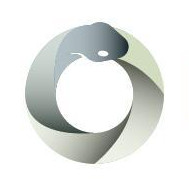

In [29]:
%load_img /Users/mac/Pictures/pypy3-o.jpeg

## 部署魔法命令脚本

部署魔法命令最简单的办法就是将对应的脚本放到ipython配置文件夹中的`startup`文件夹中(默认在`~/.ipython/profile_default`文件夹下).

`startup`文件夹下的所有python脚本会在所有用ipython构造的app(包括ipython,ipyparallel以及所有的Wrapper kernel)启动时被调用执行.

这种部署方式优点是简单方便,放进去后重启就能使用,但也缺点明显:

1. 主动加载.增加启动时间
2. 不利于分发

## 使用和发布带魔法命令的第三方包

在第三方包中如果有定义配套的魔法命令,可以在第一层的`__init__.py`中定义个名为`load_ipython_extension(ip:IPython.core.interactiveshell.InteractiveShell)->None`的函数,在这个函数中进行魔法命令注册.

这样做并不会让魔法命令直接被加载到当前进程,当我们需要时可以使用`%load_ext <模块名>`加载指定模块中的魔法命令--ipython会导入指定模块,找到其中的`load_ipython_extension`函数执行.

这样模块定义的魔法命令就可以在当前进程中执行了.